L'objectif du projet est d'essayer de comprendre les facteurs qui influences le comportement alimentaires blablabla

## Chargement packages et données 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import re 
print(os.getcwd())

file_in1 = 'data_CROUS/preprocessed_hippo/merged_21_octobre.csv'
file_in2 = 'data_CROUS/preprocessed_hippo/choix_21_octobre_clean.csv'
#on recueillera tous les resultats d'analyses dans un fichier texte de sortie
file_out = ''

/home/hippo/Documents/Projet_MIChoCo


In [40]:
merged = pd.read_csv(file_in1, sep=",", encoding='latin-1')
choix = pd.read_csv(file_in2, sep=";", encoding='latin-1')

In [41]:
# on retire les colonnes ne correspondant pas à des choix
choix = choix.drop("Horodateur", axis=1)
choix = choix.drop("Unnamed: 0", axis=1)
choix = choix.drop("num_form", axis=1)


In [42]:
#on transforme en numpy
choix = choix.to_numpy()

In [ ]:

#on affiche la matrice des choix sous forme d'une image avec matplotlib
plt.imshow(choix)
plt.show()

'''
To DO 
faire la meme chose après avoir agréger les personnes qui mange ensemble
'''

In [47]:
# calcul de la distance moyenne entre deux choix d'individus, 
# il faut définir une métrique qui sera la proportion d'items choisis en commun sur le nombre d'item total dans les deux choix
''' 
attention, ici il faut qu'on discute de la métrique choisie
'''
def distance_proportion(choix1, choix2):
    #on compte le nombre de choix en commun 
    nb_item_commun = 0
    nb_item_total = 0
    for i in range(len(choix1)):
        nb_item_total += choix1[i] + choix2[i]
        if choix1[i] == choix2[i]:
            nb_item_commun += choix1[i] + choix2[i]         
    #on calcule la proportion de choix en commun 
    proportion = nb_item_commun / nb_item_total
    return proportion
# on compte le nombre de choix en commun 



In [49]:
#un exemple de porportion de plats choisis entre 2 individus 
distance_proportion(choix[1], choix[2])

0.36363636363636365

(131, 131)


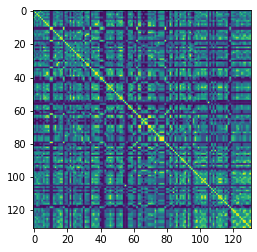

In [52]:
# on calcule la corrélation entre les individus 
corr_matrix = np.corrcoef(choix)
print(corr_matrix.shape)
plt.imshow(corr_matrix)


In [ ]:
#on calcule la distance moyenne d'un individu par rapport à tous les autres individus 


### Tretraitements de la matrice de choix 

On traite la matrice avec une logique particulière pour comprendre si les corrélations entre groupes évoluent 
* les choix prennent en compte la spatialité 
* les choix prennent en compte la healthiness

In [ ]:
# reformulation de la matrice de choix selon plusieurs critères 
